In [11]:
library(universalmotif)
library(ArchR)
library(tidyverse)

In [18]:
path = '../../../'
data_path = paste0(path,'/0_preprocess/COVID19_MHH50/scATAC/Monocyte_scATACseq/Save-ArchR-Project.rds')
out_dir = './'

In [4]:
data = readRDS(data_path)
data@sampleColData[1,]

[1] "/vol/projects/BIIM/Covid_50MHH/scATAC/analysis_new2/projMono_uniq/ArrowFiles/pool3a.arrow"

In [5]:
oldPrefix <- "/vol/projects/BIIM/Covid_50MHH/scATAC/analysis_new2/projMono_uniq/ArrowFiles/"
newPrefix <- paste0(path,"0_preprocess/COVID19_MHH50/scATAC/Monocyte_scATACseq/ArrowFiles/")
sample_df <- as.data.frame(data@sampleColData)
sample_df$ArrowFiles <- gsub(oldPrefix, newPrefix, sample_df$ArrowFiles)
data@sampleColData <- DataFrame(sample_df)
data@projectMetadata$outputDirectory <- paste0(path,'0_preprocess/COVID19_MHH50/scATAC/Monocyte_scATACseq')
getAvailableMatrices(data)

[1] "GeneIntegrationMatrix" "GeneScoreMatrix"       "MotifMatrix"          
[4] "PeakMatrix"            "TileMatrix"

In [6]:
## motif enrichment in differential peaks
markerPeaks <- getMarkerFeatures(
    ArchRProj = data, 
    useMatrix = "PeakMatrix", 
    groupBy = "Clusters",
  bias = c("TSSEnrichment", "log10(nFrags)"),
  testMethod = "wilcoxon"
)
names(assays(markerPeaks))

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-42fd743d6aa2-Date-2025-07-08_Time-21-52-25.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Integer.Matrix

2025-07-08 21:52:30 : Matching Known Biases, 0.047 mins elapsed.

2025-07-08 21:54:46 : Computing Pairwise Tests (1 of 6), 2.324 mins elapsed.

Pairwise Test C1 : Seqnames chr1

Pairwise Test C1 : Seqnames chr10

Pairwise Test C1 : Seqnames chr11

Pairwise Test C1 : Seqnames chr12

Pairwise Test C1 : Seqnames chr13

Pairwise Test C1 : Seqnames chr14

Pairwise Test C1 : Seqnames chr15

Pairwise Test C1 : Seqnames chr16

Pairwise Test C1 : Seqnames chr17

Pairwise Test C1 : Seqnames chr18

Pairwise Test C1 : Seqnames chr19

Pairwise Test C1 : Seqnames chr2

Pairwise Test C1 : Seqnames chr20

Pairwise Test C1 : Seqnames chr21

Pairwise Test C1 : Seqnames chr22

Pairwise Test C1 : Seqnames chr3

Pairwise Test C1 : Seqnames chr4

Pairwise Test C1 : Seqnames chr5

Pairwise Test C1 : Seqnames chr6


[1] "Log2FC"   "Mean"     "FDR"      "Pval"     "MeanDiff" "AUC"      "MeanBGD"

Warning message:
“'markerHeatmap' is deprecated.
Use 'plotMarkerHeatmap' instead.
See help("Deprecated")”
ArchR logging to : ArchRLogs/ArchR-plotMarkerHeatmap-42fd59c7fe9c-Date-2025-07-08_Time-22-27-26.log
If there is an issue, please report to github with logFile!

Identified 26421 markers!



 [1] "chr1:897226-897726"     "chr1:999933-1000433"    "chr1:1213427-1213927"  
 [4] "chr1:1385870-1386370"   "chr1:1745549-1746049"   "chr1:1764995-1765495"  
 [7] "chr1:1858600-1859100"   "chr1:1925593-1926093"   "chr1:2142763-2143263"  
[10] "chr1:2151216-2151716"   "chr1:2503122-2503622"   "chr1:2576565-2577065"  
[13] "chr1:2926480-2926980"   "chr1:3858115-3858615"   "chr1:5994648-5995148"  
[16] "chr1:1035518-1036018"   "chr1:1038639-1039139"   "chr1:1040636-1041136"  
[19] "chr1:1068443-1068943"   "chr1:1079827-1080327"   "chr1:1104125-1104625"  
[22] "chr1:1307113-1307613"   "chr1:1847852-1848352"   "chr1:2112446-2112946"  
[25] "chr1:2127073-2127573"   "chr1:2259928-2260428"   "chr1:2530064-2530564"  
[28] "chr1:2539317-2539817"   "chr1:2555398-2555898"   "chr1:2801464-2801964"  
[31] "chr1:898651-899151"     "chr1:941485-941985"     "chr1:1022646-1023146"  
[34] "chr1:1039479-1039979"   "chr1:1201235-1201735"   "chr1:1207882-1208382"  
[37] "chr1:1336051-1336551"   "chr1:2231

Warning message:
“package ‘ComplexHeatmap’ was built under R version 4.2.1”
Adding Annotations..

Preparing Main Heatmap..

'magick' package is suggested to install to give better rasterization.

Set `ht_opt$message = FALSE` to turn off this message.

ArchR logging successful to : ArchRLogs/ArchR-plotMarkerHeatmap-42fd59c7fe9c-Date-2025-07-08_Time-22-27-26.log



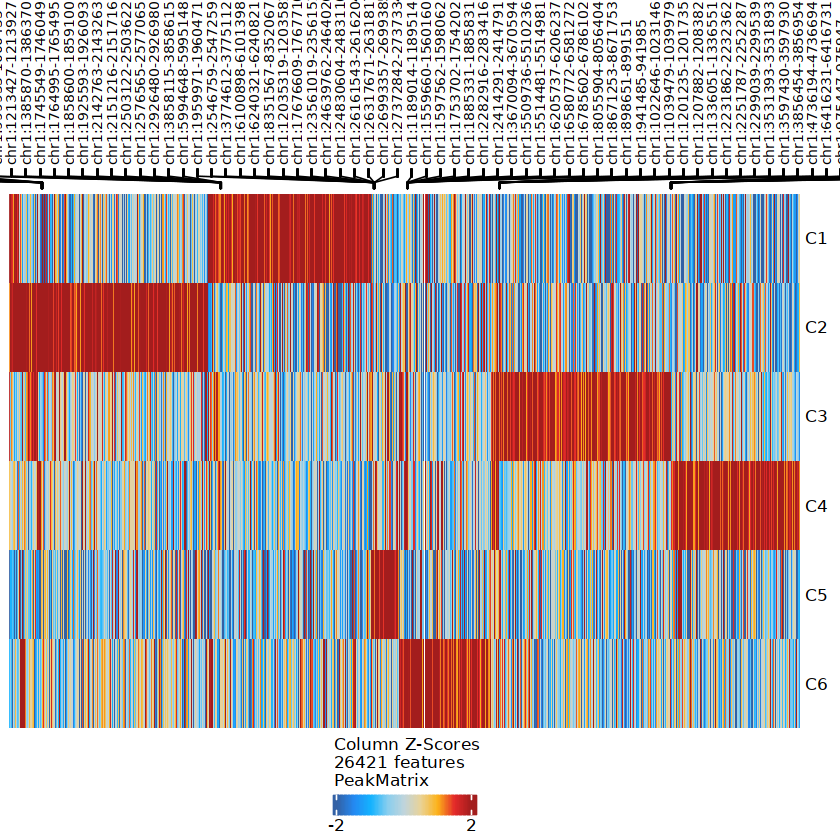

In [7]:
heatmapPeaks <- markerHeatmap(
  seMarker = markerPeaks, 
  cutOff = "Pval <= 0.05 & Log2FC >= 1", ## & Log2FC >= 0.5",
  transpose = TRUE,
    plotLog2FC = TRUE
)
draw(heatmapPeaks, heatmap_legend_side = "bot", annotation_legend_side = "bot")

In [8]:
data@peakAnnotation$Motif$Positions <- file.path(getOutputDirectory(data), "Annotations", "Motif-Positions-In-Peaks.rds")
data@peakAnnotation$Motif$Matches <- file.path(getOutputDirectory(data), "Annotations", "Motif-Matches-In-Peaks.rds")
motifenrichUP <- peakAnnoEnrichment(
  seMarker = markerPeaks,
  ArchRProj = data,
  peakAnnotation = "Motif",
  cutOff = "Pval <= 0.05 & Log2FC > 1"
)

ArchR logging to : ArchRLogs/ArchR-peakAnnoEnrichment-42fd39f48e5b-Date-2025-07-08_Time-22-28-43.log
If there is an issue, please report to github with logFile!

2025-07-08 22:29:29 : Computing Enrichments 1 of 6, 0.774 mins elapsed.

2025-07-08 22:29:31 : Computing Enrichments 2 of 6, 0.797 mins elapsed.

2025-07-08 22:29:32 : Computing Enrichments 3 of 6, 0.826 mins elapsed.

2025-07-08 22:29:34 : Computing Enrichments 4 of 6, 0.848 mins elapsed.

2025-07-08 22:29:35 : Computing Enrichments 5 of 6, 0.872 mins elapsed.

2025-07-08 22:29:37 : Computing Enrichments 6 of 6, 0.894 mins elapsed.

ArchR logging successful to : ArchRLogs/ArchR-peakAnnoEnrichment-42fd39f48e5b-Date-2025-07-08_Time-22-28-43.log



In [13]:
## Extract motifs enriched in peaks with higher accessible in C1
cells_mlog10p <- assay(motifenrichUP, "mlog10p")[, "C1"]
cells_Enrichment <- assay(motifenrichUP, "Enrichment")[, "C1"]

df1 <- data.frame(
  TF = rownames(motifenrichUP),
    mlog10p = cells_mlog10p,
    Enrichment = cells_Enrichment,
  celltype = "C1"
)

## Re-correct the P-value
df = df1
df_processed <- df %>%
  mutate(TF_prefix = str_replace(TF, "_\\d+$", "")) %>%
  group_by(celltype) %>%
  mutate(
    p_value = case_when(
      is.infinite(mlog10p) ~ 0,
      TRUE ~ 10^(-mlog10p)
    ),
    padj = p.adjust(p_value, method = "BH"),
    mlog10padj_new = case_when(
      padj == 0 ~ -log10(.Machine$double.xmin),
      TRUE ~ -log10(padj)
    )
  ) %>%
  ungroup() %>%
  select(-p_value, -padj) %>%
  rename(mlog10padj = mlog10padj_new) ## here is re-corrected p-val
df_sorted1 <- df_processed[order(df_processed$mlog10padj, decreasing = TRUE), ]
head(df_sorted1)

TF,mlog10p,Enrichment,celltype,TF_prefix,mlog10padj
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
SPIB_336,74.5243,1.433494,C1,SPIB,71.58478
SPI1_322,53.5401,1.261297,C1,SPI1,50.90161
SPIC_344,40.4009,1.353738,C1,SPIC,37.93850
NR4A1_671,36.3337,1.595815,C1,NR4A1,33.99624
NR2F2_694,35.9821,1.495851,C1,NR2F2,33.74155
POU5F1B_622,29.7516,1.585293,C1,POU5F1B,27.59023


In [19]:
write.csv(df_sorted1, file = paste0(out_dir, "C1UP_diff005p_enrichmotif.csv"),row.names = FALSE)

In [15]:
## Extract motifs enriched in peaks with higher accessible in C4
cells_mlog10p <- assay(motifenrichUP, "mlog10p")[, "C4"]
cells_Enrichment <- assay(motifenrichUP, "Enrichment")[, "C4"]

df1 <- data.frame(
  TF = rownames(motifenrichUP),
    mlog10p = cells_mlog10p,
    Enrichment = cells_Enrichment,
  celltype = "C4"
)

## Re-correct the P-value
df = df1
df_processed <- df %>%
  mutate(TF_prefix = str_replace(TF, "_\\d+$", "")) %>%
  group_by(celltype) %>%
  mutate(
    p_value = case_when(
      is.infinite(mlog10p) ~ 0,
      TRUE ~ 10^(-mlog10p)
    ),
    padj = p.adjust(p_value, method = "BH"),
    mlog10padj_new = case_when(
      padj == 0 ~ -log10(.Machine$double.xmin),
      TRUE ~ -log10(padj)
    )
  ) %>%
  ungroup() %>%
  select(-p_value, -padj) %>%
  rename(mlog10padj = mlog10padj_new)
df_sorted2 <- df_processed[order(df_processed$mlog10padj, decreasing = TRUE), ]
head(df_sorted2)

TF,mlog10p,Enrichment,celltype,TF_prefix,mlog10padj
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
CEBPA_155,73.1875,1.815738,C4,CEBPA,70.24798
CEBPB_140,62.8909,1.871725,C4,CEBPB,60.25241
CEBPD_152,52.7668,1.726866,C4,CEBPD,50.30440
JUN_143,46.8049,1.634848,C4,JUN,44.46744
JUNB_139,41.8427,1.593925,C4,JUNB,39.60215
FOS_137,39.6430,1.564871,C4,FOS,37.48163


In [20]:
write.csv(df_sorted2, file = paste0(out_dir, "C4UP_diff005p_enrichmotif.csv"),row.names = FALSE)